<a href="https://colab.research.google.com/github/farisazizy/kaggle_explorations/blob/master/Food_Market_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [3]:
data = pd.read_csv('WA_Marketing-Campaign.csv')

In [5]:
data.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


# EDA

In [6]:
data.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


In [12]:
print(data['MarketSize'].unique())
print(data['Promotion'].unique())
print(data['week'].unique())

['Medium' 'Small' 'Large']
[3 2 1]
[1 2 3 4]


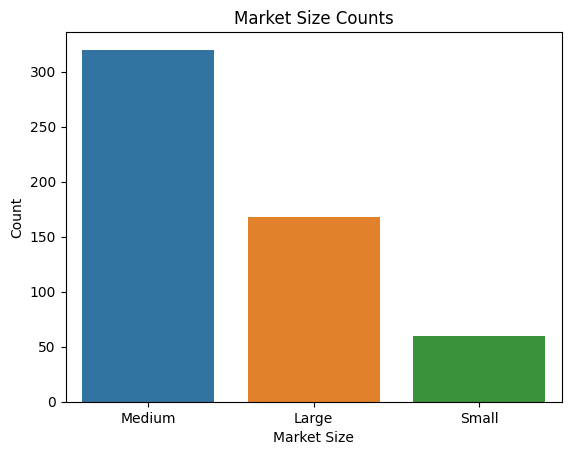

In [10]:
market_size_counts = data["MarketSize"].value_counts().reset_index()
market_size_counts.columns = ["MarketSize", "Count"]

sns.barplot(x="MarketSize", y="Count", data=market_size_counts)
plt.title("Market Size Counts")
plt.xlabel("Market Size")
plt.ylabel("Count")
plt.show()

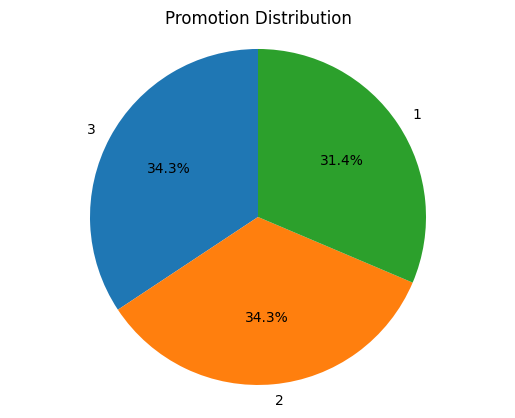

In [13]:
promotion_counts = data["Promotion"].value_counts()

fig, ax = plt.subplots()
ax.pie(promotion_counts, labels=promotion_counts.index, autopct="%1.1f%%", startangle=90)
ax.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Promotion Distribution")
plt.show()

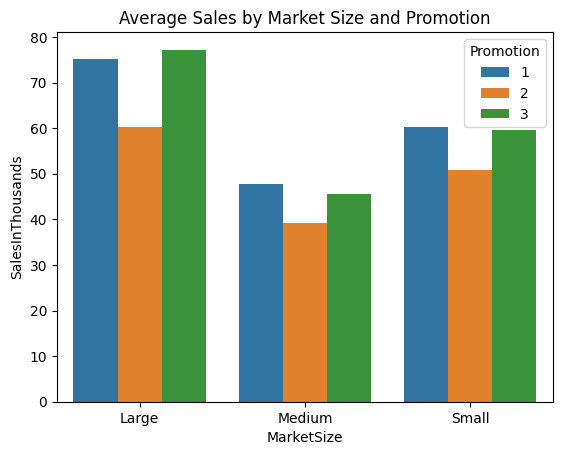

In [14]:
market_size_grouped = data.groupby(["MarketSize", "Promotion"])["SalesInThousands"].mean().reset_index()
sns.barplot(x="MarketSize", y="SalesInThousands", hue="Promotion", data=market_size_grouped)
plt.title("Average Sales by Market Size and Promotion")
plt.show()

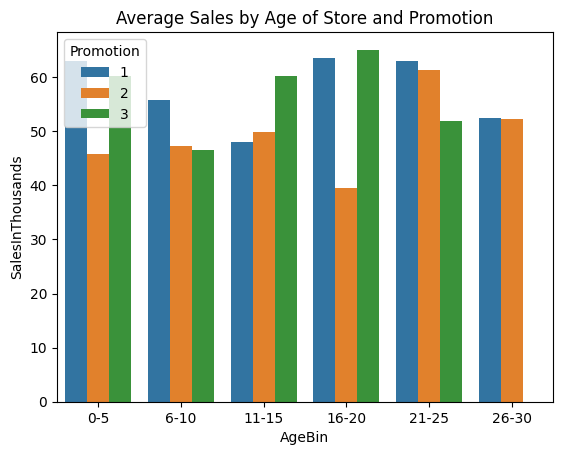

In [15]:
data["AgeBin"] = pd.cut(data["AgeOfStore"], bins=[0, 5, 10, 15, 20, 25, 30], labels=["0-5", "6-10", "11-15", "16-20", "21-25", "26-30"])
age_grouped = data.groupby(["AgeBin", "Promotion"])["SalesInThousands"].mean().reset_index()
sns.barplot(x="AgeBin", y="SalesInThousands", hue="Promotion", data=age_grouped)
plt.title("Average Sales by Age of Store and Promotion")
plt.show()

# Hypothesis

In [27]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [29]:
df = pd.DataFrame(data)

# Perform ANOVA
anova_result = f_oneway(
    df[df["Promotion"] == 1]["SalesInThousands"],
    df[df["Promotion"] == 2]["SalesInThousands"],
    df[df["Promotion"] == 3]["SalesInThousands"]
)

# Print ANOVA results
print("ANOVA Results:")
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

ANOVA Results:
F-statistic: 21.953485793080677
p-value: 6.765849261408714e-10


In [30]:
# Create a DataFrame for Tukey's HSD
tukey_data = pd.DataFrame({
    "SalesInThousands": df["SalesInThousands"],
    "Promotion": df["Promotion"]
})

# Perform Tukey's HSD post-hoc test
tukey_result = pairwise_tukeyhsd(
    endog=tukey_data["SalesInThousands"],
    groups=tukey_data["Promotion"],
    alpha=0.05
)

# Print Tukey's HSD results
print("\nTukey's HSD Results:")
print(tukey_result)



Tukey's HSD Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -10.7696    0.0 -14.7738 -6.7654   True
     1      3  -2.7345 0.2444  -6.7388  1.2697  False
     2      3   8.0351    0.0   4.1208 11.9493   True
-----------------------------------------------------
